Regresion

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargando datos desde seaborn
df=sns.load_dataset('mpg')

https://pypi.org/project/pandas-profiling/


In [ ]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 22.0 MB 21.6 MB/s 0:00:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 5.9 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=fa4520de18ccc70ce22ff577a44080cfda9a2490d089059dcbe1e5c2a986eef3
  Stored in directory: /tmp/pip-ephem-wheel-cache-exyv58tx/wheels/8e/70/3e/0fedd1728e310b5af797b1c8a9ef27ebf4046917c84a2fe736
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha25

In [ ]:

from pandas_profiling import ProfileReport

profile = ProfileReport(df,title='Mi Reporte')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

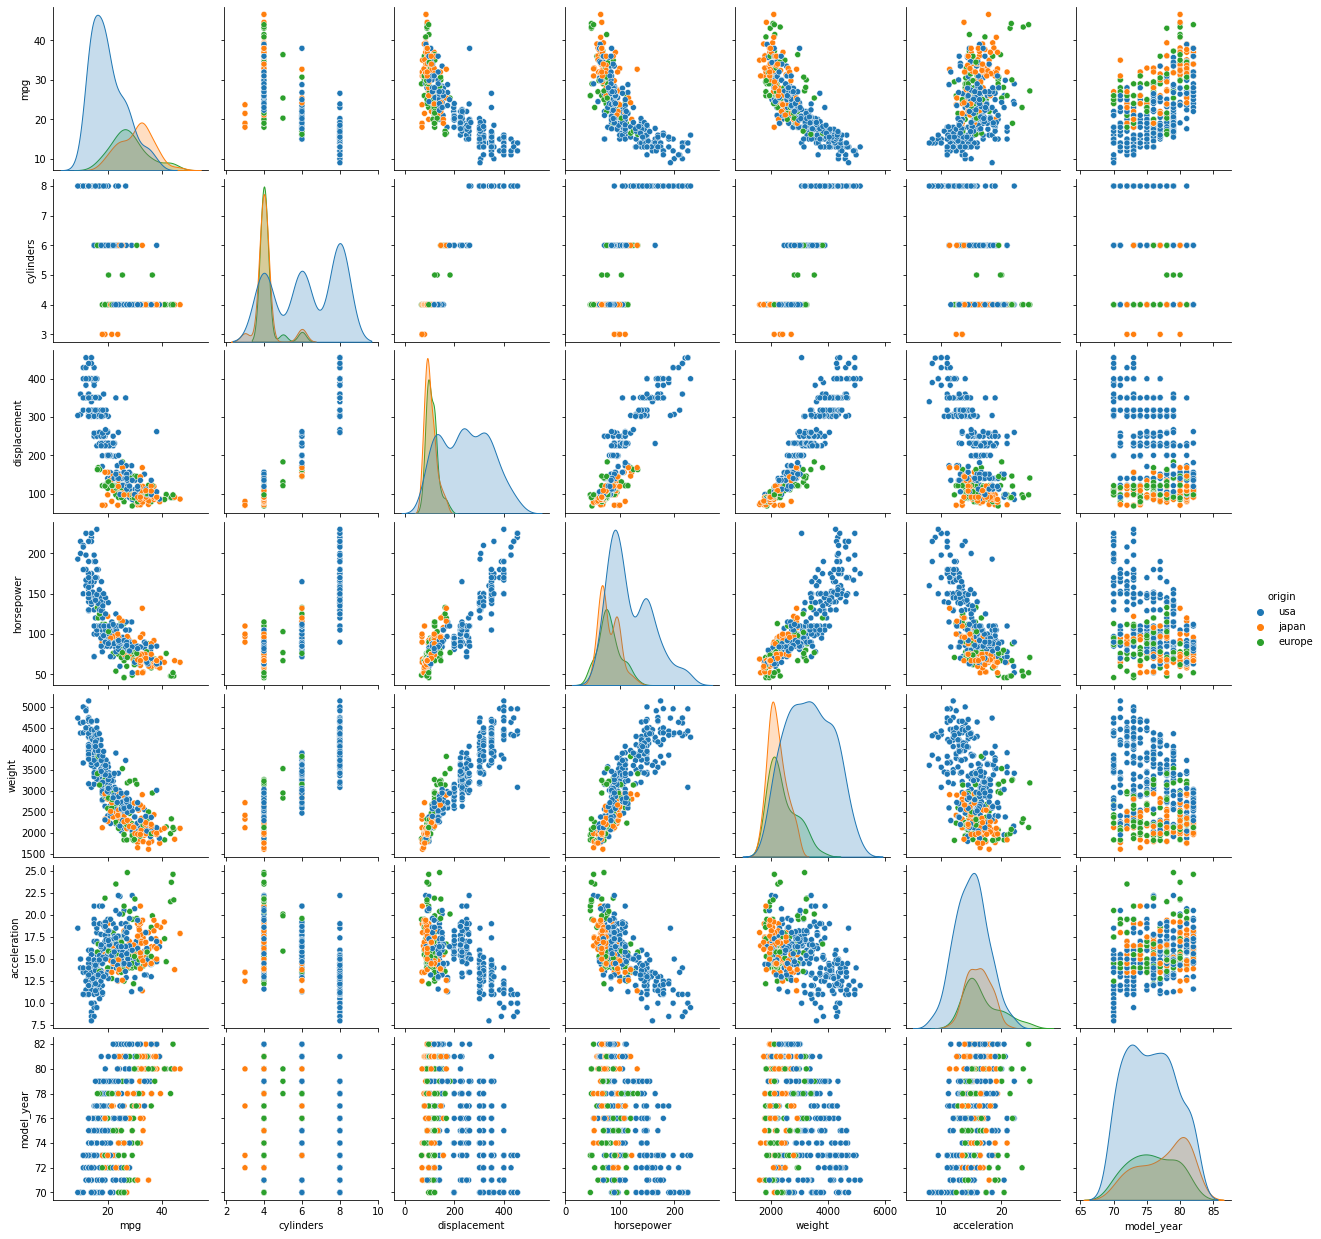

In [ ]:
sns.pairplot(df, hue = 'origin')
plt.show()

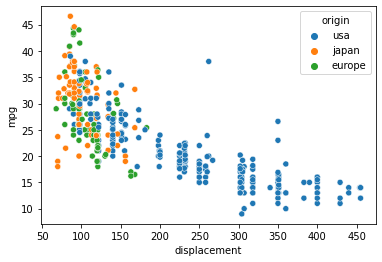

In [ ]:
sns.scatterplot(data=df,x='displacement', y='mpg',hue='origin')
plt.show()

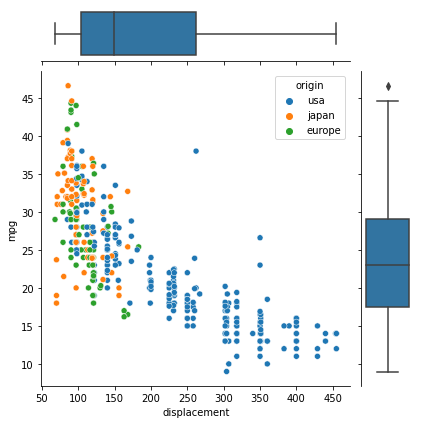

In [ ]:
# Dato atipico: 75, 45
g = sns.JointGrid(data=df,x='displacement', y='mpg',hue='origin')
g.plot(sns.scatterplot,sns.boxplot)
plt.show()

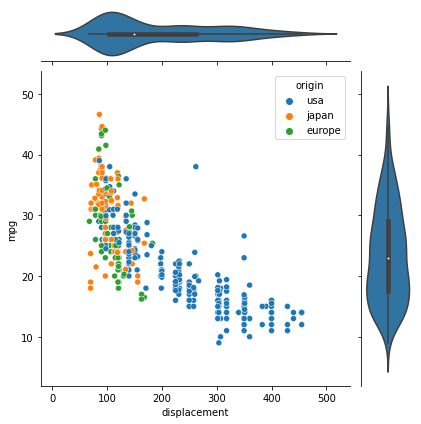

In [ ]:
g = sns.JointGrid(data=df,x='displacement', y='mpg',hue='origin')
g.plot(sns.scatterplot,sns.violinplot)
plt.show()

<img src="http://www.theobjects.com/dragonfly/dfhelp/2020-1/Content/Resources/Images/deep-learning/data-preparation-workflow.png">


In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
# One hot encoding -> Cualitativas a Cuantitativas (Variables Dummy)
# 1. Identifica cuantas etiquetas hay en la columna
# 2. Crea un número de columnas igual a la cantidad de etiquetas
# 3. Asignará un valor 1 en donde la respuesta sea verdadera y cero donde sea falso
df=pd.get_dummies(df.iloc[:,:-1])
df


mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin_europe  origin_japan  origin_usa  
0            70              0             0           1  
1            70              0             0           1  
2            70              0             0           1  
3            70              0             0           1  
4            70              0             0           1  
..          ...            ...           ...         ...  
393          82              0             0           1  
394          82              1             0           0  
395          82              0             0           1  
396          82              0             0           1  
397          82              0             0           1  

[398 rows x 10 columns]

In [ ]:
df=df[df.horsepower.isna()==False]
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin_europe  origin_japan  origin_usa  
0          70              0             0           1  
1          70              0             0           1  
2          70              0             0           1  
3          70              0             0           1  
4          70              0             0           1

## Regresión Lineal

In [ ]:
# Los datos ya deben de ingresar limpios a partir de esta sección
# Creando los sets de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
x= df.iloc[:,1:-1]
y= df.mpg
X_train, X_test, y_train, y_test = train_test_split(
                                    x,                # Datos independientes
                                    y,                # Variable objetivo
                                    test_size=0.33,   # Tamaño de la partición
                                    random_state=42)  # La semilla de Numpy

In [ ]:
print(df.shape[0])
print(X_train.shape[0])
print(X_test.shape[0])

392
262
130


In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

reg.score(X_train, y_train)

0.8297695220430708

# Evaluando el modelo (Testing phase)

In [ ]:
y_predict=reg.predict(X_test)

In [ ]:
print(y_predict[:10].round(2))
print(y_test.values[:10])

[27.36 27.06 34.52 24.68 28.04 30.42  8.79 30.63 20.63 30.25]
[26.  21.6 36.1 26.  27.  28.  13.  26.  19.  29. ]


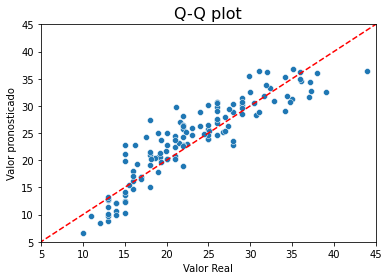

In [ ]:
# Creando un Q-Q plot
sns.scatterplot(x=y_test, y=y_predict)
plt.xlabel('Valor Real')
plt.ylabel('Valor pronosticado')
plt.title('Q-Q plot', size=16)
plt.plot([0,50], [0,50],color='Red',linestyle='--')
plt.xlim(5,45)
plt.ylim(5,45)

plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R^2:',r2_score(y_test, y_predict))
print('MSE:',mean_squared_error(y_test, y_predict))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_predict)))
print('MAE:',mean_absolute_error(y_test, y_predict))

R^2: 0.7964817032975609
MSE: 10.747668299625307
RMSE: 3.278363661893736
MAE: 2.583726968955638


# Comparativa de modelos

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

Training phase: 0.8297695220430708


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


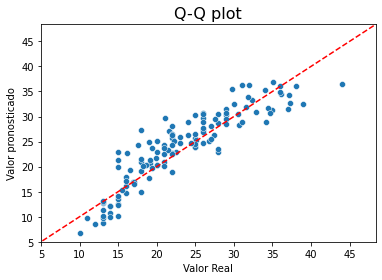

R^2: 0.7964817032975609
MSE: 10.747668299625307
RMSE: 3.278363661893736
MAE: 2.583726968955638

 --------------------------------------------------
Training phase: 0.9824230071465828


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


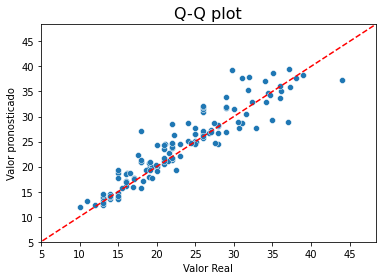

R^2: 0.851224678243035
MSE: 7.856727553846135
RMSE: 2.802985471572433
MAE: 1.9711230769230759

 --------------------------------------------------
Training phase: 0.7056600450631638


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


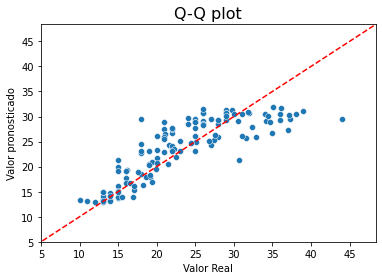

R^2: 0.6941321530766731
MSE: 16.152681186492487
RMSE: 4.019039833902183
MAE: 3.063608028085199

 --------------------------------------------------
Training phase: 1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


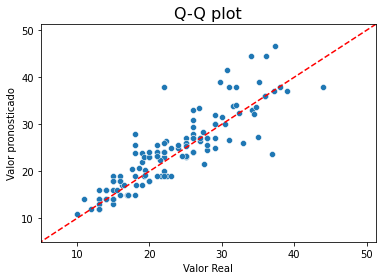

R^2: 0.7069108574961336
MSE: 15.477846153846155
RMSE: 3.934189389676882
MAE: 2.7953846153846156

 --------------------------------------------------


In [ ]:


modelos=[LinearRegression(), RandomForestRegressor(), SVR(), DecisionTreeRegressor()]

for modelo in modelos:
  reg = modelo.fit(X_train, y_train)
  print('Training phase:', reg.score(X_train, y_train))
  y_predict=reg.predict(X_test)
  Q_Q_plot(y_test, y_predict)
  print('R^2:',r2_score(y_test, y_predict))
  print('MSE:',mean_squared_error(y_test, y_predict))
  print('RMSE:',np.sqrt(mean_squared_error(y_test, y_predict)))
  print('MAE:',mean_absolute_error(y_test, y_predict))
  print('\n','-'*50)



In [ ]:
# Creando un Q-Q plot

def Q_Q_plot(y_testeo, y_prediccion):
  coord_max=max(max(y_testeo),max(y_prediccion))*1.1
  sns.scatterplot(y_testeo, y_prediccion)
  plt.xlabel('Valor Real')
  plt.ylabel('Valor pronosticado')
  plt.title('Q-Q plot', size=16)
  plt.plot([0,coord_max], [0,coord_max],color='Red',linestyle='--')
  plt.xlim(5,coord_max)
  plt.ylim(5,coord_max)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


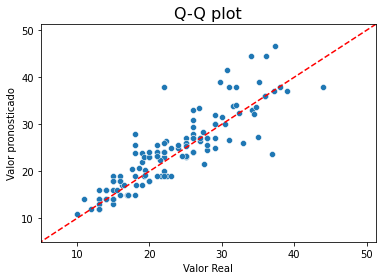

In [ ]:
Q_Q_plot(y_test, y_predict)

In [ ]:
from sklearn.model_selection import train_test_split
x= df.iloc[:,1:-1]
y= df.mpg
X_train, X_test, y_train, y_test = train_test_split(
                                    x,                # Datos independientes
                                    y,                # Variable objetivo
                                    test_size=0.33,   # Tamaño de la partición
                                    random_state=42)  # La semilla de Numpy